In [1]:
#Importing Libraries
!pip install textblob
!pip install WordCloud
!pip install collections
import tweepy
from textblob import TextBlob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud
import json
from collections import Counter


ERROR: Could not find a version that satisfies the requirement collections (from versions: none)
ERROR: No matching distribution found for collections
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
#Authorization and Search tweets
#Getting authorization
consumer_key = 'CQDPDzbOMjXKcbZgbxcBXTcEX'
consumer_key_secret = 'bMB5F5Y2lqSOA8DQuBmC8iqWjfZYsdIbnmW4U5tfTFHFNmknjs'
access_token = '1360589615392907265-pAaOVrbPVYGgMUDelW3jV6v81J2ckc'
access_token_secret = 'bohKtuls7fBgQ3QDu65oaetBLvDaPRm2aaSEJjXc6LvS1'
auth = tweepy.OAuthHandler(consumer_key, consumer_key_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, wait_on_rate_limit=True)

In [3]:
#Defining Search keyword and number of tweets and searching tweets
query = 'covaxin'
max_tweets = 100
searched_tweets = [status for status in tweepy.Cursor(api.search, q=query).items(max_tweets)]

In [4]:
#Creating Dataframe of Tweets
#Cleaning searched tweets and converting into Dataframe
my_list_of_dicts = []
for each_json_tweet in searched_tweets:
    my_list_of_dicts.append(each_json_tweet._json)

    
with open('tweet_json_Data5.txt', 'w') as file:
        file.write(json.dumps(my_list_of_dicts, indent=4))

        
my_demo_list = []
with open('tweet_json_Data5.txt', encoding='utf-8') as json_file:  
    all_data = json.load(json_file)
    for each_dictionary in all_data:
        tweet_id = each_dictionary['id']
        text = each_dictionary['text']
        favorite_count = each_dictionary['favorite_count']
        retweet_count = each_dictionary['retweet_count']
        created_at = each_dictionary['created_at']
        my_demo_list.append({'tweet_id': str(tweet_id),
                             'text': str(text),
                             'favorite_count': int(favorite_count),
                             'retweet_count': int(retweet_count),
                             'created_at': created_at,
                            })
        
        tweet_dataset = pd.DataFrame(my_demo_list, columns = 
                                  ['tweet_id', 'text', 
                                   'favorite_count', 'retweet_count', 
                                   'created_at'])

 #Writing tweet dataset ti csv file for future reference
tweet_dataset.to_csv('tweet_data5.csv')

In [5]:
tweet_dataset.shape

(100, 5)

In [6]:
tweet_dataset.head()

,tweet_id,text,favorite_count,retweet_count,created_at
0,1387810985629548548,RT @BharatBiotech: Bharat Biotech - COVAXIN® A...,0,1902,Thu Apr 29 16:48:17 +0000 2021
1,1387810977702420487,RT @larazon_es: La alarmante advertencia de un...,0,3,Thu Apr 29 16:48:16 +0000 2021
2,1387810975122739204,RT @ANI: We had placed orders for purchase Cov...,0,236,Thu Apr 29 16:48:15 +0000 2021
3,1387810974409707522,"RT @nsitharaman: “ Covaxin, India's home-grown...",0,3137,Thu Apr 29 16:48:15 +0000 2021
4,1387810966780317698,@ChouhanShivraj Mama shree agar vaccin nhi den...,1,0,Thu Apr 29 16:48:13 +0000 2021


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv("tweet_data5.csv")


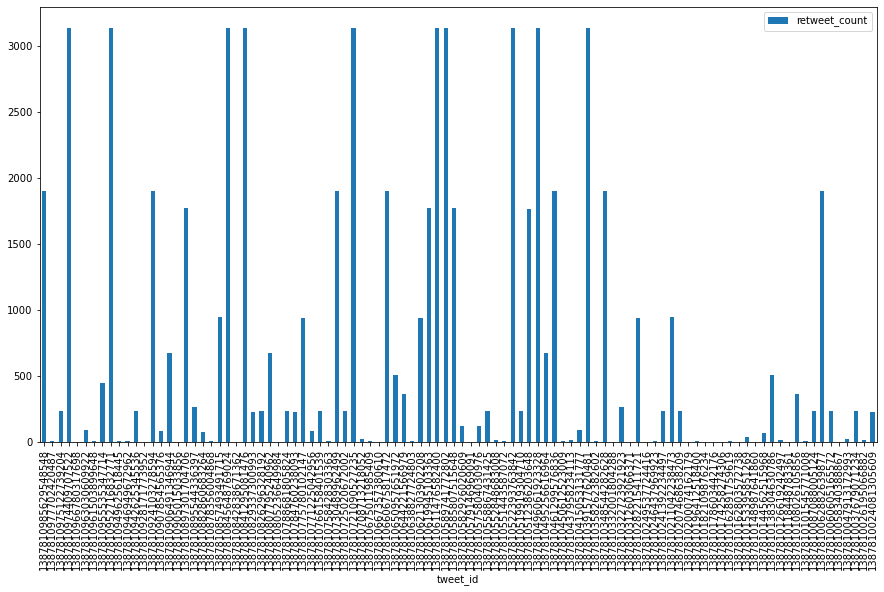

In [3]:
data = pd.read_csv("tweet_data5.csv")
plt.rcParams['figure.figsize'] = [15,8]
data.plot.bar('tweet_id','retweet_count')

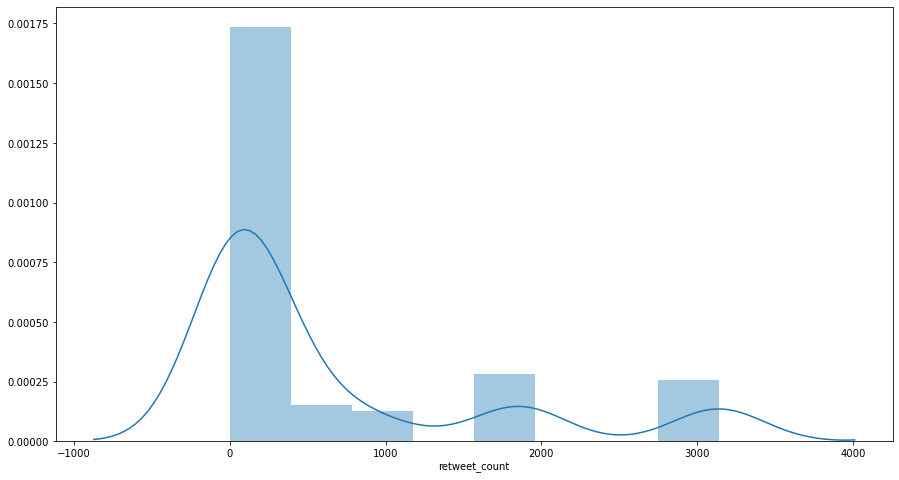

In [5]:

import seaborn as sns
sns.distplot(data.retweet_count)

Text(0, 0.5, 'retweet_count')

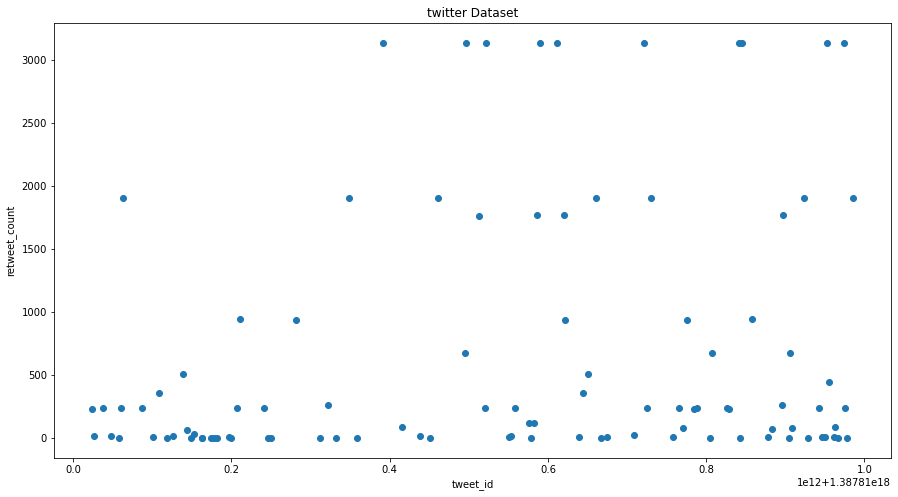

In [4]:
fig, ax = plt.subplots()
ax.scatter(data['tweet_id'], data['retweet_count'])
ax.set_title('twitter Dataset')
ax.set_xlabel('tweet_id')
ax.set_ylabel('retweet_count')

In [12]:
#Cleaning Data
#Removing @ handle
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
     
    return input_txt 

tweet_dataset['text'] = np.vectorize(remove_pattern)(tweet_dataset['text'], "@[\w]*")

tweet_dataset.head()

,tweet_id,text,favorite_count,retweet_count,created_at
0,1387810985629548548,RT : Bharat Biotech - COVAXIN® Announcement - ...,0,1902,Thu Apr 29 16:48:17 +0000 2021
1,1387810977702420487,RT : La alarmante advertencia de una doctora d...,0,3,Thu Apr 29 16:48:16 +0000 2021
2,1387810975122739204,RT : We had placed orders for purchase Covishi...,0,236,Thu Apr 29 16:48:15 +0000 2021
3,1387810974409707522,"RT : “ Covaxin, India's home-grown COVID-19 va...",0,3137,Thu Apr 29 16:48:15 +0000 2021
4,1387810966780317698,Mama shree agar vaccin nhi dena cahate to man...,1,0,Thu Apr 29 16:48:13 +0000 2021


In [13]:
tweet_dataset.head()

,tweet_id,text,favorite_count,retweet_count,created_at
0,1387810985629548548,RT : Bharat Biotech - COVAXIN® Announcement - ...,0,1902,Thu Apr 29 16:48:17 +0000 2021
1,1387810977702420487,RT : La alarmante advertencia de una doctora d...,0,3,Thu Apr 29 16:48:16 +0000 2021
2,1387810975122739204,RT : We had placed orders for purchase Covishi...,0,236,Thu Apr 29 16:48:15 +0000 2021
3,1387810974409707522,"RT : “ Covaxin, India's home-grown COVID-19 va...",0,3137,Thu Apr 29 16:48:15 +0000 2021
4,1387810966780317698,Mama shree agar vaccin nhi dena cahate to man...,1,0,Thu Apr 29 16:48:13 +0000 2021


In [14]:
tweet_dataset['text'].head()

0    RT : Bharat Biotech - COVAXIN® Announcement - ...
1    RT : La alarmante advertencia de una doctora d...
2    RT : We had placed orders for purchase Covishi...
3    RT : “ Covaxin, India's home-grown COVID-19 va...
4     Mama shree agar vaccin nhi dena cahate to man...
Name: text, dtype: object

In [15]:
compare_list=tweet_dataset['text'].head()

In [16]:
from nltk.tokenize import word_tokenize
word_tokens = []
for sent in compare_list:
    print(word_tokenize(sent))
    word_tokens.append(word_tokenize(sent))

['RT', ':', 'Bharat', 'Biotech', '-', 'COVAXIN®', 'Announcement', '-', 'April', '29', ',', '2021', 'https', ':', '//t.co/RgnROIfUCe']
['RT', ':', 'La', 'alarmante', 'advertencia', 'de', 'una', 'doctora', 'desde', 'India', ':', '“', 'Vacunados', 'con', 'AstraZeneca', 'se', 'contagian', 'de', 'la', 'nueva', 'variante', '”', '➡', '“', 'Comen…']
['RT', ':', 'We', 'had', 'placed', 'orders', 'for', 'purchase', 'Covishield', '&', 'amp', ';', 'Covaxin', 'vaccines', '.', 'But', 'manufacturers', 'of', 'both', 'vaccines', 'have', 'said', 'that', 'they', 'wo', "n't", 'be', 'a…']
['RT', ':', '“', 'Covaxin', ',', 'India', "'s", 'home-grown', 'COVID-19', 'vaccine', ',', 'has', 'been', 'found', 'to', 'neutralise', 'the', '617', 'variant', 'of', 'the', 'deadly', 'virus', '...', '”', 'Dr.', 'F…']
['Mama', 'shree', 'agar', 'vaccin', 'nhi', 'dena', 'cahate', 'to', 'mana', 'kar', 'dijiye', '...', 'Pahale', 'register', 'nhi', 'ho', 'rha', 'tha', 'aab', 'jab…', 'https', ':', '//t.co/4BNWg1RxRr']


In [17]:
from nltk.tokenize import WordPunctTokenizer
punct_tokenizer = WordPunctTokenizer()
punct_tokens = []
for sent in compare_list:
    print(punct_tokenizer.tokenize(sent))
    punct_tokens.append(punct_tokenizer.tokenize(sent))

['RT', ':', 'Bharat', 'Biotech', '-', 'COVAXIN', '®', 'Announcement', '-', 'April', '29', ',', '2021', 'https', '://', 't', '.', 'co', '/', 'RgnROIfUCe']
['RT', ':', 'La', 'alarmante', 'advertencia', 'de', 'una', 'doctora', 'desde', 'India', ':', '“', 'Vacunados', 'con', 'AstraZeneca', 'se', 'contagian', 'de', 'la', 'nueva', 'variante', '”', '➡', '“', 'Comen', '…']
['RT', ':', 'We', 'had', 'placed', 'orders', 'for', 'purchase', 'Covishield', '&', 'amp', ';', 'Covaxin', 'vaccines', '.', 'But', 'manufacturers', 'of', 'both', 'vaccines', 'have', 'said', 'that', 'they', 'won', "'", 't', 'be', 'a', '…']
['RT', ':', '“', 'Covaxin', ',', 'India', "'", 's', 'home', '-', 'grown', 'COVID', '-', '19', 'vaccine', ',', 'has', 'been', 'found', 'to', 'neutralise', 'the', '617', 'variant', 'of', 'the', 'deadly', 'virus', '...”', 'Dr', '.', 'F', '…']
['Mama', 'shree', 'agar', 'vaccin', 'nhi', 'dena', 'cahate', 'to', 'mana', 'kar', 'dijiye', '...', 'Pahale', 'register', 'nhi', 'ho', 'rha', 'tha', 'aab',

In [18]:
from nltk.tokenize import RegexpTokenizer
match_tokenizer = RegexpTokenizer("[\w']+")
match_tokens = []
for sent in compare_list:   
    print(match_tokenizer.tokenize(sent))
    match_tokens.append(match_tokenizer.tokenize(sent))

['RT', 'Bharat', 'Biotech', 'COVAXIN', 'Announcement', 'April', '29', '2021', 'https', 't', 'co', 'RgnROIfUCe']
['RT', 'La', 'alarmante', 'advertencia', 'de', 'una', 'doctora', 'desde', 'India', 'Vacunados', 'con', 'AstraZeneca', 'se', 'contagian', 'de', 'la', 'nueva', 'variante', 'Comen']
['RT', 'We', 'had', 'placed', 'orders', 'for', 'purchase', 'Covishield', 'amp', 'Covaxin', 'vaccines', 'But', 'manufacturers', 'of', 'both', 'vaccines', 'have', 'said', 'that', 'they', "won't", 'be', 'a']
['RT', 'Covaxin', "India's", 'home', 'grown', 'COVID', '19', 'vaccine', 'has', 'been', 'found', 'to', 'neutralise', 'the', '617', 'variant', 'of', 'the', 'deadly', 'virus', 'Dr', 'F']
['Mama', 'shree', 'agar', 'vaccin', 'nhi', 'dena', 'cahate', 'to', 'mana', 'kar', 'dijiye', 'Pahale', 'register', 'nhi', 'ho', 'rha', 'tha', 'aab', 'jab', 'https', 't', 'co', '4BNWg1RxRr']


In [19]:
space_tokenizer = RegexpTokenizer("\s+", gaps=True)
space_tokens = []
for sent in compare_list:
    
    print(space_tokenizer.tokenize(sent))
    space_tokens.append(space_tokenizer.tokenize(sent))

['RT', ':', 'Bharat', 'Biotech', '-', 'COVAXIN®', 'Announcement', '-', 'April', '29,', '2021', 'https://t.co/RgnROIfUCe']
['RT', ':', 'La', 'alarmante', 'advertencia', 'de', 'una', 'doctora', 'desde', 'India:', '“Vacunados', 'con', 'AstraZeneca', 'se', 'contagian', 'de', 'la', 'nueva', 'variante”', '➡', '“Comen…']
['RT', ':', 'We', 'had', 'placed', 'orders', 'for', 'purchase', 'Covishield', '&amp;', 'Covaxin', 'vaccines.', 'But', 'manufacturers', 'of', 'both', 'vaccines', 'have', 'said', 'that', 'they', "won't", 'be', 'a…']
['RT', ':', '“', 'Covaxin,', "India's", 'home-grown', 'COVID-19', 'vaccine,', 'has', 'been', 'found', 'to', 'neutralise', 'the', '617', 'variant', 'of', 'the', 'deadly', 'virus...”', 'Dr.', 'F…']
['Mama', 'shree', 'agar', 'vaccin', 'nhi', 'dena', 'cahate', 'to', 'mana', 'kar', 'dijiye...', 'Pahale', 'register', 'nhi', 'ho', 'rha', 'tha', 'aab', 'jab…', 'https://t.co/4BNWg1RxRr']


In [20]:
import pandas as pd
tokenizers = {'word_tokenize': word_tokens,
             'WordPunctTokenize':punct_tokens,
             'RegrexTokenizer for matching':match_tokens,
             'RegrexTokenizer for white space': space_tokens}
             
df = pd.DataFrame.from_dict(tokenizers)
df

,word_tokenize,WordPunctTokenize,RegrexTokenizer for matching,RegrexTokenizer for white space
0,"[RT, :, Bharat, Biotech, -, COVAXIN®, Announce...","[RT, :, Bharat, Biotech, -, COVAXIN, ®, Announ...","[RT, Bharat, Biotech, COVAXIN, Announcement, A...","[RT, :, Bharat, Biotech, -, COVAXIN®, Announce..."
1,"[RT, :, La, alarmante, advertencia, de, una, d...","[RT, :, La, alarmante, advertencia, de, una, d...","[RT, La, alarmante, advertencia, de, una, doct...","[RT, :, La, alarmante, advertencia, de, una, d..."
2,"[RT, :, We, had, placed, orders, for, purchase...","[RT, :, We, had, placed, orders, for, purchase...","[RT, We, had, placed, orders, for, purchase, C...","[RT, :, We, had, placed, orders, for, purchase..."
3,"[RT, :, “, Covaxin, ,, India, 's, home-grown, ...","[RT, :, “, Covaxin, ,, India, ', s, home, -, g...","[RT, Covaxin, India's, home, grown, COVID, 19,...","[RT, :, “, Covaxin,, India's, home-grown, COVI..."
4,"[Mama, shree, agar, vaccin, nhi, dena, cahate,...","[Mama, shree, agar, vaccin, nhi, dena, cahate,...","[Mama, shree, agar, vaccin, nhi, dena, cahate,...","[Mama, shree, agar, vaccin, nhi, dena, cahate,..."


In [31]:
match_tokens

[['RT',
  'Bharat',
  'Biotech',
  'COVAXIN',
  'Announcement',
  'April',
  '29',
  '2021',
  'https',
  't',
  'co',
  'RgnROIfUCe'],
 ['RT',
  'La',
  'alarmante',
  'advertencia',
  'de',
  'una',
  'doctora',
  'desde',
  'India',
  'Vacunados',
  'con',
  'AstraZeneca',
  'se',
  'contagian',
  'de',
  'la',
  'nueva',
  'variante',
  'Comen'],
 ['RT',
  'We',
  'had',
  'placed',
  'orders',
  'for',
  'purchase',
  'Covishield',
  'amp',
  'Covaxin',
  'vaccines',
  'But',
  'manufacturers',
  'of',
  'both',
  'vaccines',
  'have',
  'said',
  'that',
  'they',
  "won't",
  'be',
  'a'],
 ['RT',
  'Covaxin',
  "India's",
  'home',
  'grown',
  'COVID',
  '19',
  'vaccine',
  'has',
  'been',
  'found',
  'to',
  'neutralise',
  'the',
  '617',
  'variant',
  'of',
  'the',
  'deadly',
  'virus',
  'Dr',
  'F'],
 ['Mama',
  'shree',
  'agar',
  'vaccin',
  'nhi',
  'dena',
  'cahate',
  'to',
  'mana',
  'kar',
  'dijiye',
  'Pahale',
  'register',
  'nhi',
  'ho',
  'rha',
  '

In [22]:
#python3 -m pip install collections
!pip install --pre --upgrade collection==0.1.6
!pip install collections-extended
!pip install Counter
!pip install more-itertools
import collections
from collections import Counter
import warnings
warnings.filterwarnings("ignore")
import itertools    
def plot_confusion_matrix(cm, classes,
                              normalize=False,
                              title='Confusion matrix',
                              cmap=plt.cm.Blues):
        import itertools
        plt.imshow(cm, interpolation='nearest', cmap=cmap)
        plt.title(title)
        plt.colorbar()
        tick_marks = np.arange(len(classes))
        plt.xticks(tick_marks, classes, rotation=45)
        plt.yticks(tick_marks, classes)

        if normalize:
            cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
            print("Normalized confusion matrix")
        else:
            print('Confusion matrix, without normalization')

        print(cm)

        thresh = cm.max() / 2.
        for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
            plt.text(j, i, cm[i, j],
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")

        plt.tight_layout()
        plt.ylabel('True label')
        plt.xlabel('Predicted label')

# List of all words across tweets

all_words_no_urls = list(itertools.chain(*space_tokens))

# Create counter
counts_no_urls = collections.Counter(all_words_no_urls)

counts_no_urls.most_common(15)

Requirement already up-to-date: collection==0.1.6 in c:\users\user\anaconda3\lib\site-packages (0.1.6)


[('RT', 4),
 (':', 4),
 ('-', 2),
 ('de', 2),
 ('of', 2),
 ('to', 2),
 ('the', 2),
 ('nhi', 2),
 ('Bharat', 1),
 ('Biotech', 1),
 ('COVAXIN®', 1),
 ('Announcement', 1),
 ('April', 1),
 ('29,', 1),
 ('2021', 1)]

In [23]:
clean_tweets_no_urls = pd.DataFrame(counts_no_urls.most_common(15),
                             columns=['words', 'count'])

clean_tweets_no_urls.head(15)

,words,count
0,RT,4
1,:,4
2,-,2
3,de,2
4,of,2
5,to,2
6,the,2
7,nhi,2
8,Bharat,1
9,Biotech,1


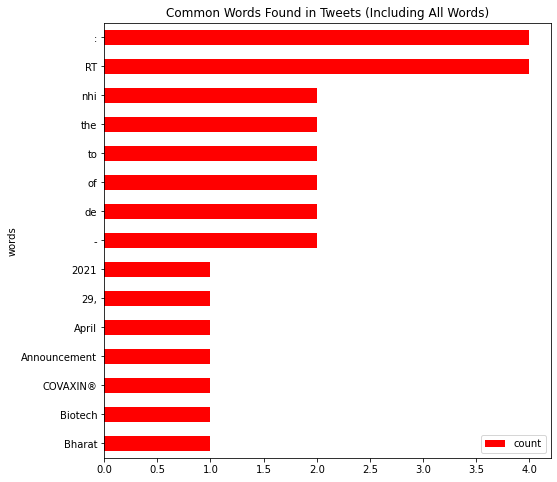

In [24]:
fig, ax = plt.subplots(figsize=(8, 8))

# Plot horizontal bar graph
clean_tweets_no_urls.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="red")

ax.set_title("Common Words Found in Tweets (Including All Words)")

plt.show()

(-0.5, 2999.5, 2499.5, -0.5)

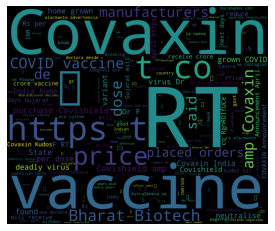

In [28]:
from wordcloud import WordCloud, STOPWORDS
words = ' '.join(tweet_dataset['text'])
wordcloud = WordCloud(stopwords = 
                      STOPWORDS, background_color='black', 
                      height = 2500, width = 3000).generate(words)
plt.imshow(wordcloud)
plt.axis('off')

Total Positive =  16
Total Negative =  14
Total Neutral =  70


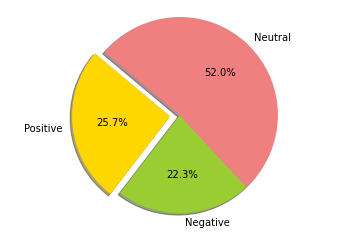

In [30]:
#Sentiment Analysis Report
#Finding sentiment analysis (+ve, -ve and neutral)
pos = 0
neg = 0
neu = 0
for tweet in searched_tweets:
    analysis = TextBlob(tweet.text)
    if analysis.sentiment[0]>0:
       pos = pos +1
    elif analysis.sentiment[0]<0:
       neg = neg + 1
    else:
       neu = neu + 1
print("Total Positive = ", pos)
print("Total Negative = ", neg)
print("Total Neutral = ", neu)

#Plotting sentiments
labels = 'Positive', 'Negative', 'Neutral'
sizes = [257, 223, 520]
colors = ['gold', 'yellowgreen', 'lightcoral']
explode = (0.1, 0, 0)  # explode 1st slice
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.show()